<a href="https://colab.research.google.com/github/harikadevireddy9/Edunet-IBM-SkillsBuild/blob/main/AICTE_stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (replace 'dataset.csv' with your dataset file)
data = pd.read_csv('dataset.csv')

# Data preprocessing
# Assuming 'stroke' is the target variable and other columns are features
X = data.drop(columns=['stroke'])
y = data['stroke']

# Handling missing values (fill with mean)
X.fillna(X.mean(numeric_only=True), inplace=True)

# Encoding categorical variables (if any)
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9393346379647749

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


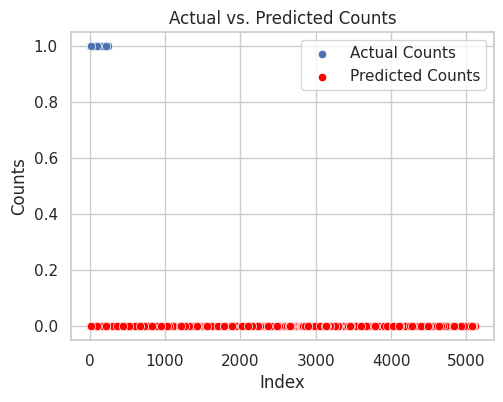

In [ ]:
# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))

# Plotting predicted vs. actual counts
plt.subplot(1, 2, 1)
plt.title("Actual vs. Predicted Counts")
sns.scatterplot(x=y_test.index, y=y_test, label="Actual Counts")
sns.scatterplot(x=y_test.index, y=y_pred, color='red', label="Predicted Counts")
plt.xlabel("Index")
plt.ylabel("Counts")
plt.legend()

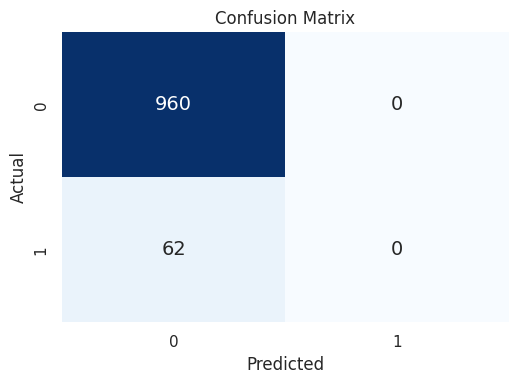

In [ ]:
# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

# Plotting confusion matrix
plt.subplot(1, 2, 2)
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 14})
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()